In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel ('Company.xlsx')
df.head(10)

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
5,153,140,154,199,NaN
6,34,28,78,22,Quality A
7,191,144,143,154,NaN
8,160,181,194,178,Quality B
9,145,178,158,141,NaN


In [3]:
df.isna().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0FFAD5988>,
      dtype=object)

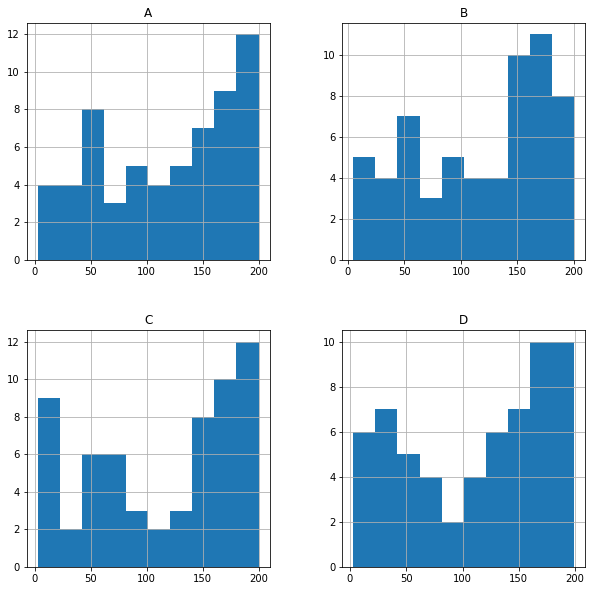

In [4]:
# Histogram
df.hist(figsize=(10, 10))

NO need for normalization as the attributes lie on the same scales between 0 to 200

In [5]:
#copy of the original data frame
new_df = df.copy()
df = df.drop('Quality', axis = 1)

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='Quality B'or'Quality A')
#imputer.fit(df[['Quality']])
#df['Quality']=imputer.transform(df[['Quality']]).ravel()

In [6]:
from scipy.stats import zscore
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2) # Clusters being A and B
lbl=kmeans.fit(df)
labels = kmeans.labels_


In [7]:
new_df['Predicted Quality'] = labels
new_df


,A,B,C,D,Quality,Predicted Quality
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,NaN,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1
...,...,...,...,...,...,...
56,200,186,185,179,Quality B,0
57,137,182,165,199,NaN,0
58,88,39,9,102,NaN,1
59,180,157,192,198,NaN,0


In [8]:
# Renaming Pred_quality with Quality A and Quality B
new_df['Predicted Quality'] = new_df['Predicted Quality'].replace({0:'Quality A', 1:'Quality B'})
new_df

,A,B,C,D,Quality,Predicted Quality
0,47,27,45,108,Quality A,Quality B
1,174,133,134,166,Quality B,Quality A
2,159,163,135,131,NaN,Quality A
3,61,23,3,44,Quality A,Quality B
4,59,60,9,68,Quality A,Quality B
...,...,...,...,...,...,...
56,200,186,185,179,Quality B,Quality A
57,137,182,165,199,NaN,Quality A
58,88,39,9,102,NaN,Quality B
59,180,157,192,198,NaN,Quality A


In [9]:
# dropping Quality row from new_df
df1 = new_df.dropna()
df1

,A,B,C,D,Quality,Predicted Quality
0,47,27,45,108,Quality A,Quality B
1,174,133,134,166,Quality B,Quality A
3,61,23,3,44,Quality A,Quality B
4,59,60,9,68,Quality A,Quality B
6,34,28,78,22,Quality A,Quality B
8,160,181,194,178,Quality B,Quality A
10,76,94,107,37,Quality A,Quality B
11,138,200,153,192,Quality B,Quality A
12,27,106,57,37,Quality A,Quality B
13,45,76,56,57,Quality A,Quality B


In [10]:
df1.shape

(43, 6)

In [11]:
predicted = df1['Predicted Quality']
actual = df1['Quality']

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
cm= confusion_matrix(actual, pred)
sns.heatmap(cm, annot = True)
plt.xlabel('Actual', fontsize = 15)

plt.ylabel('Predicted', fontsize = 15)

NameError: name 'pred' is not defined

In [12]:

from sklearn.datasets import make_blobs
make_blobs(n_samples = 100,n_features = 2)


(array([[ -7.67508212,  -3.23766057],
        [ -8.63000286,  -2.77525109],
        [  2.67009016,  -0.02056233],
        [ -6.27996809,  -1.02035669],
        [  4.02522282,   1.92742095],
        [ -7.94697582,  -2.63769893],
        [ -7.28870016,   0.30060964],
        [ -7.39089695,  -5.06378287],
        [ -7.19595746,  -3.05131297],
        [  2.92739387,   1.49270338],
        [  4.86352713,  -0.36471345],
        [ -6.39099908,   1.2298219 ],
        [ -8.08354881,  -1.64845255],
        [ -8.44650223,  -3.61350131],
        [ -9.39305391,  -2.77454225],
        [ -8.73279084,  -3.24779197],
        [  4.4930219 ,   1.54544172],
        [ -7.04624506,  -3.4749595 ],
        [ -9.26756143,  -1.75679281],
        [ -8.04899963,   0.15677041],
        [ -6.9761948 ,   0.52195423],
        [ -7.47233476,   0.85285411],
        [  5.03078587,   1.47821733],
        [ -7.54985853,  -3.0401144 ],
        [ -7.4142422 ,  -2.24506765],
        [  3.62331126,   0.56767659],
        [  3